Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [56]:
import requests
import os
import re
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [57]:
df_marseille_data = pd.read_csv("df_marseille_stations.csv")
df_pois_data = pd.read_csv("df_yelp_data.csv")
df_joined_data = pd.merge(df_marseille_data, df_pois_data, how="outer")

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [58]:
df_joined_data.to_csv("df_joined_data", index=False)

print(df_joined_data)

      Unnamed: 0                 name   Latitude  Longitude  Empty Slots  \
0              0   Cours Jean Ballard  43.293009   5.374584          NaN   
1              1      Allées Gambetta  43.299028   5.381509          NaN   
2              2   Réformés Canebière  43.299717   5.384845          NaN   
3              3          Coutellerie  43.296800   5.372910          NaN   
4              4  Canebiere - Beauvau  43.295279   5.375048          NaN   
...          ...                  ...        ...        ...          ...   
1939        1761                  NaN  43.281130   5.396490          NaN   
1940        1762                  NaN  43.280410   5.389960          NaN   
1941        1763                  NaN  43.285430   5.387440          NaN   
1942        1764                  NaN  43.287370   5.389653          NaN   
1943        1765                  NaN  43.288422   5.392217          NaN   

      free_bikes                    timestamp                      Id  \
0            0

In [59]:
df_joined_data.head()


,Unnamed: 0,name,Latitude,Longitude,Empty Slots,free_bikes,timestamp,Id,Name,Category,Distance,Address,review_count,rating
0,0,Cours Jean Ballard,43.293009,5.374584,NaN,0.0,2023-10-30T03:33:01.001000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Allées Gambetta,43.299028,5.381509,NaN,0.0,2023-10-30T03:33:01.196000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Réformés Canebière,43.299717,5.384845,NaN,0.0,2023-10-30T03:33:01.296000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Coutellerie,43.296800,5.372910,NaN,0.0,2023-10-30T03:33:00.905000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Canebiere - Beauvau,43.295279,5.375048,NaN,0.0,2023-10-30T03:33:00.941000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
columns_to_drop = ["Unnamed: 0", "Empty Slots", "timestamp"]
df_joined_data = df_joined_data.drop(columns=columns_to_drop)

In [61]:
df_joined_data

,name,Latitude,Longitude,free_bikes,Id,Name,Category,Distance,Address,review_count,rating
0,Cours Jean Ballard,43.293009,5.374584,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allées Gambetta,43.299028,5.381509,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Réformés Canebière,43.299717,5.384845,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coutellerie,43.296800,5.372910,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canebiere - Beauvau,43.295279,5.375048,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1939,NaN,43.281130,5.396490,NaN,8zll8DzncxxK2pLqNrSKVg,Il Topolino,"[{'alias': 'restaurants', 'title': 'Restaurant...",319.0,59 Chemin De L Argile,4.0,4.5
1940,NaN,43.280410,5.389960,NaN,fhCE24M9dVjyZX7h3m3fmg,Le Balagan,"[{'alias': 'soup', 'title': 'Soup'}, {'alias':...",821.0,99 rue Rouet,21.0,4.0
1941,NaN,43.285430,5.387440,NaN,GcHCb9sXgNr-4Mw2mMBiHA,Cyprien,"[{'alias': 'french', 'title': 'French'}]",1165.0,56 avenue Toulon,32.0,3.5
1942,NaN,43.287370,5.389653,NaN,3qy7uSp7cESLuSSay4GghA,Le Fantastique,"[{'alias': 'french', 'title': 'French'}]",1180.0,76 boulevard Baille,17.0,4.0


In [62]:
replacement_value = "bike station"
df_joined_data["Category"] = df_joined_data["Category"].fillna(replacement_value)

df_joined_data

,name,Latitude,Longitude,free_bikes,Id,Name,Category,Distance,Address,review_count,rating
0,Cours Jean Ballard,43.293009,5.374584,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
1,Allées Gambetta,43.299028,5.381509,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
2,Réformés Canebière,43.299717,5.384845,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
3,Coutellerie,43.296800,5.372910,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
4,Canebiere - Beauvau,43.295279,5.375048,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1939,NaN,43.281130,5.396490,NaN,8zll8DzncxxK2pLqNrSKVg,Il Topolino,"[{'alias': 'restaurants', 'title': 'Restaurant...",319.0,59 Chemin De L Argile,4.0,4.5
1940,NaN,43.280410,5.389960,NaN,fhCE24M9dVjyZX7h3m3fmg,Le Balagan,"[{'alias': 'soup', 'title': 'Soup'}, {'alias':...",821.0,99 rue Rouet,21.0,4.0
1941,NaN,43.285430,5.387440,NaN,GcHCb9sXgNr-4Mw2mMBiHA,Cyprien,"[{'alias': 'french', 'title': 'French'}]",1165.0,56 avenue Toulon,32.0,3.5
1942,NaN,43.287370,5.389653,NaN,3qy7uSp7cESLuSSay4GghA,Le Fantastique,"[{'alias': 'french', 'title': 'French'}]",1180.0,76 boulevard Baille,17.0,4.0


In [63]:
df_joined_data.to_csv("df_joined_data", index=True)

In [64]:
df_bike_stations = df_joined_data[df_joined_data["Category"] == "bike station"]

print(df_bike_stations)

                                      name   Latitude  Longitude  free_bikes  \
0                       Cours Jean Ballard  43.293009   5.374584         0.0   
1                          Allées Gambetta  43.299028   5.381509         0.0   
2                       Réformés Canebière  43.299717   5.384845         0.0   
3                              Coutellerie  43.296800   5.372910         0.0   
4                      Canebiere - Beauvau  43.295279   5.375048         0.0   
..                                     ...        ...        ...         ...   
173  Boulevard Urbain Sud - Pont de Vivaux  43.281548   5.426430         7.0   
174                     Lieutaud - Berlioz  43.289307   5.384060         2.0   
175                  Corse - Saint Maurice  43.289468   5.363719         3.0   
176                               Beaumont  43.308051   5.435270         3.0   
177                      Palais Omnisports  43.279952   5.400085         0.0   

      Id Name      Category  Distance A

In [65]:
columns_to_drop = ["Distance", "Address", "review_count", "rating", "Id"]
df_bike_stations = df_bike_stations.drop(columns=columns_to_drop)

In [66]:
df_bike_stations.to_csv("df_bike_stations", index=True)
print(df_bike_stations)

                                      name   Latitude  Longitude  free_bikes  \
0                       Cours Jean Ballard  43.293009   5.374584         0.0   
1                          Allées Gambetta  43.299028   5.381509         0.0   
2                       Réformés Canebière  43.299717   5.384845         0.0   
3                              Coutellerie  43.296800   5.372910         0.0   
4                      Canebiere - Beauvau  43.295279   5.375048         0.0   
..                                     ...        ...        ...         ...   
173  Boulevard Urbain Sud - Pont de Vivaux  43.281548   5.426430         7.0   
174                     Lieutaud - Berlioz  43.289307   5.384060         2.0   
175                  Corse - Saint Maurice  43.289468   5.363719         3.0   
176                               Beaumont  43.308051   5.435270         3.0   
177                      Palais Omnisports  43.279952   5.400085         0.0   

    Name      Category  
0    NaN  bike

<Axes: xlabel='free_bikes'>

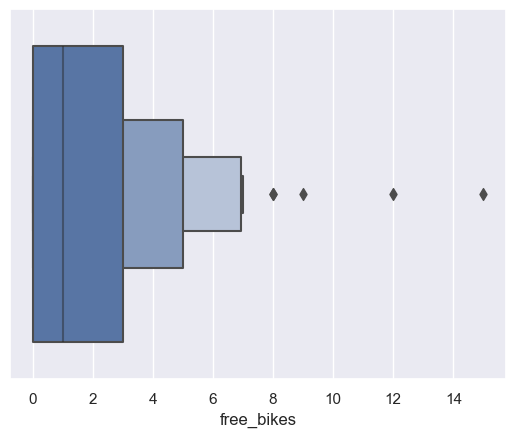

In [67]:
mean_available_bikes = pd.read_csv("df_bike_stations")

sns.boxenplot(x=df_bike_stations["free_bikes"])

Text(0, 0.5, 'Number of Reviews')

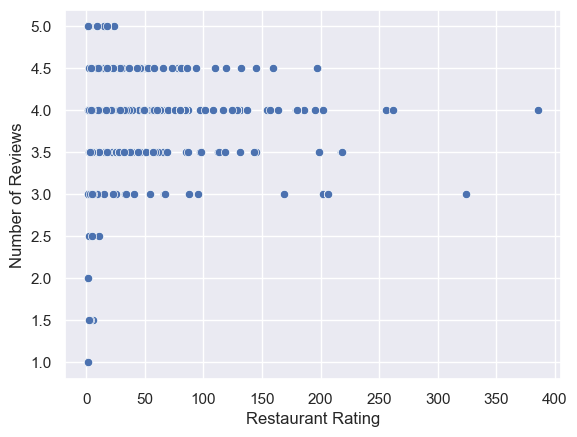

In [71]:
sns.scatterplot(x=df_joined_data["review_count"], y=df_joined_data["rating"])
plt.xlabel("Restaurant Rating")
plt.ylabel("Number of Reviews")

Text(0.5, 1.0, 'Rating vs. Distance From Bike Station')

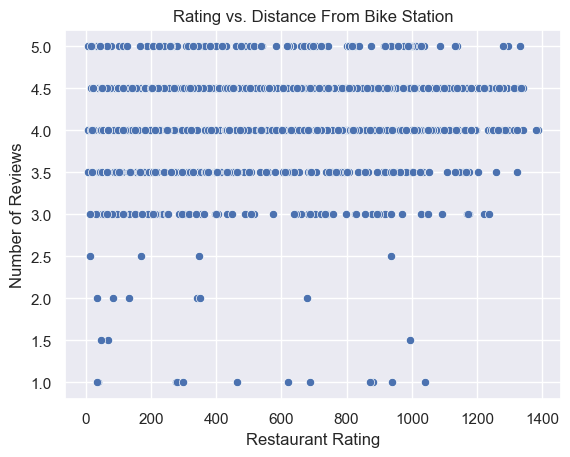

In [75]:
sns.scatterplot(x=df_joined_data["Distance"], y=df_joined_data["rating"])
plt.xlabel("Distance")
plt.ylabel("Rating")
plt.title("Rating vs. Distance From Bike Station")

# Database

In [77]:
import sqlite3

from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.